# Pregunta 4
Leemos la base de datos desde la web

In [1]:
pagina = 'http://fosorios.mat.utfsm.cl/files/data/bloodsugar.csv'
x <- url(pagina, "r")
x <- readLines(x)
data = read.csv(text = x)

In [2]:
data
summary(data)
dim(data)

L1,L2,L3,L4,L5,Group,Treatment
<int>,<int>,<int>,<int>,<int>,<int>,<chr>
77,52,35,56,64,1,A
90,47,52,68,90,1,B
85,52,35,39,60,1,A
94,60,60,77,94,1,B
77,56,43,56,64,1,A
85,52,60,81,94,1,B
103,26,68,30,30,1,A
107,60,68,90,94,1,B
77,43,64,39,64,1,A


       L1               L2           L3              L4        
 Min.   : 68.00   Min.   : 8   Min.   : 2.00   Min.   :  8.00  
 1st Qu.: 85.00   1st Qu.:35   1st Qu.:26.00   1st Qu.: 43.00  
 Median : 90.00   Median :47   Median :39.00   Median : 64.00  
 Mean   : 91.64   Mean   :44   Mean   :40.64   Mean   : 60.24  
 3rd Qu.: 99.00   3rd Qu.:56   3rd Qu.:52.00   3rd Qu.: 77.00  
 Max.   :116.00   Max.   :73   Max.   :99.00   Max.   :107.00  
       L5             Group      Treatment        
 Min.   : 22.00   Min.   :1.0   Length:88         
 1st Qu.: 67.00   1st Qu.:1.0   Class :character  
 Median : 90.00   Median :1.5   Mode  :character  
 Mean   : 81.51   Mean   :1.5                     
 3rd Qu.: 99.00   3rd Qu.:2.0                     
 Max.   :120.00   Max.   :2.0                     

[1] 88  7

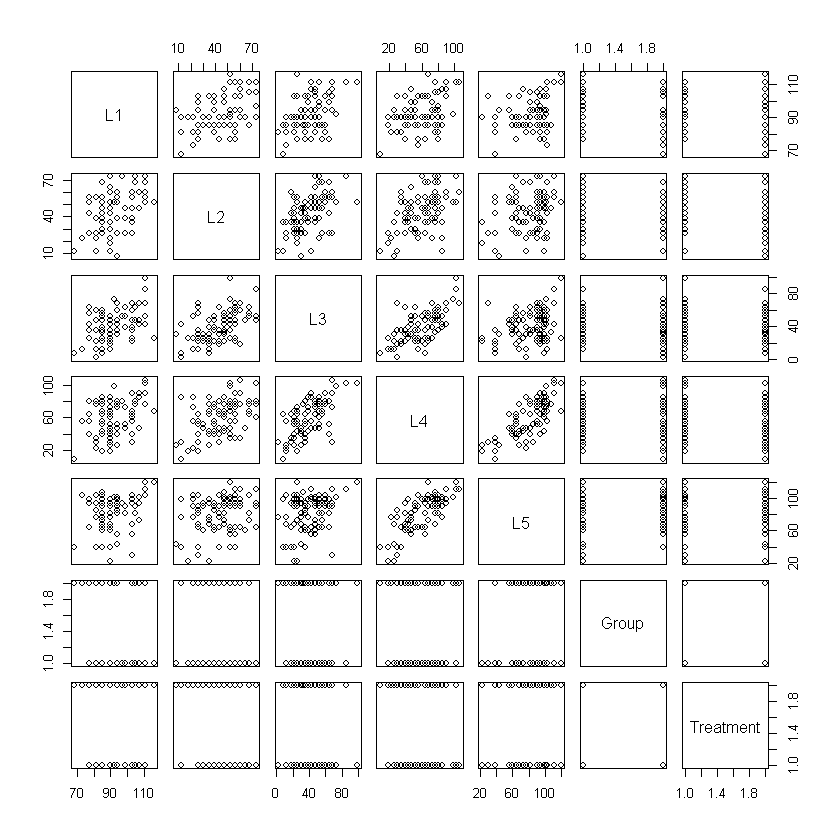

In [3]:
plot(data)

Notemos que se ven tendencias lineales entres las variables.

Realizamos la construcción de las matrices del modelo:

In [34]:
# matriz  de  respuestas
Y = matrix(as.numeric(unlist(data[,1:5])),nrow=nrow(data[,1:5]))

In [39]:
# matrices  de  diseño
X1 = rep(1,dim(Y)[1]/4)
X2 = rep(0,dim(Y)[1]/4)
X  = rbind(cbind(X1,X2),cbind(X2,X1),cbind(X1,X2),cbind(X2,X1))
Z  = rbind(rep(1,5),c(0,1.5,3,4.5,6))

In [41]:
# Estimador
XX = crossprod(X)
ZZ = crossprod(t(Z))
XYZ = crossprod(X, Y%*%t(Z))
B = solve(XX, XYZ%*%solve(ZZ))

In [43]:
print(B)

       [,1]       [,2]
X1 65.89091 -0.0969697
X2 62.92273 -0.4378788


# Conclusiones rapidas.

Con el tratamiento B el nivel de azucar en la sangre baja mas rápido que con el tratamiento A.

## Estimador para la varianza

In [51]:
res = Y-X%*%B%*%Z
n = nrow(Y)
Sigma = crossprod(res)/n
Sigma

840.467614,-499.0819,-565.8846,-5.108796,582.2078
-499.081875,634.9414,607.0630,227.915943,-290.5900
-565.884566,607.0630,859.1196,324.867283,-319.9732
-5.108796,227.9159,324.8673,476.548866,290.1517
582.207831,-290.5900,-319.9732,290.151705,827.7413


# Conclusión
Existen fuertes correlaciones entre las variables.

# Varianza de B


In [60]:
Bvar = kronecker(solve(XX), solve(ZZ, Z%*%Sigma%*%t(Z))%*%solve(ZZ))
Bvar

2.8580510,-0.2757285,0.0000000,0.0000000
-0.2757285,0.3048390,0.0000000,0.0000000
0.0000000,0.0000000,2.8580510,-0.2757285
0.0000000,0.0000000,-0.2757285,0.3048390


In [ ]:
La matriz de covarianza es antisimetrica y simetrica por bloques lo cual le da una estructura de rela